# Hamamatsu Camera


###  Free running mode

In [5]:
from sashimi.hardware.cameras.hamamatsu.interface import *
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Initialize camera object (run only once -> if run twice will give error since the camera will be already instantiated)
cam = HamamatsuCamera(0, (2048, 2048))


In [3]:
# set trigger mode
cam.trigger_mode = TriggerMode.FREE


In [18]:
# record for 1 second
cam.start_acquisition()
time.sleep(1)
test = cam.get_frames()
cam.stop_acquisition()



In [19]:
#check data
np.shape(test)


(18, 2048, 2048)

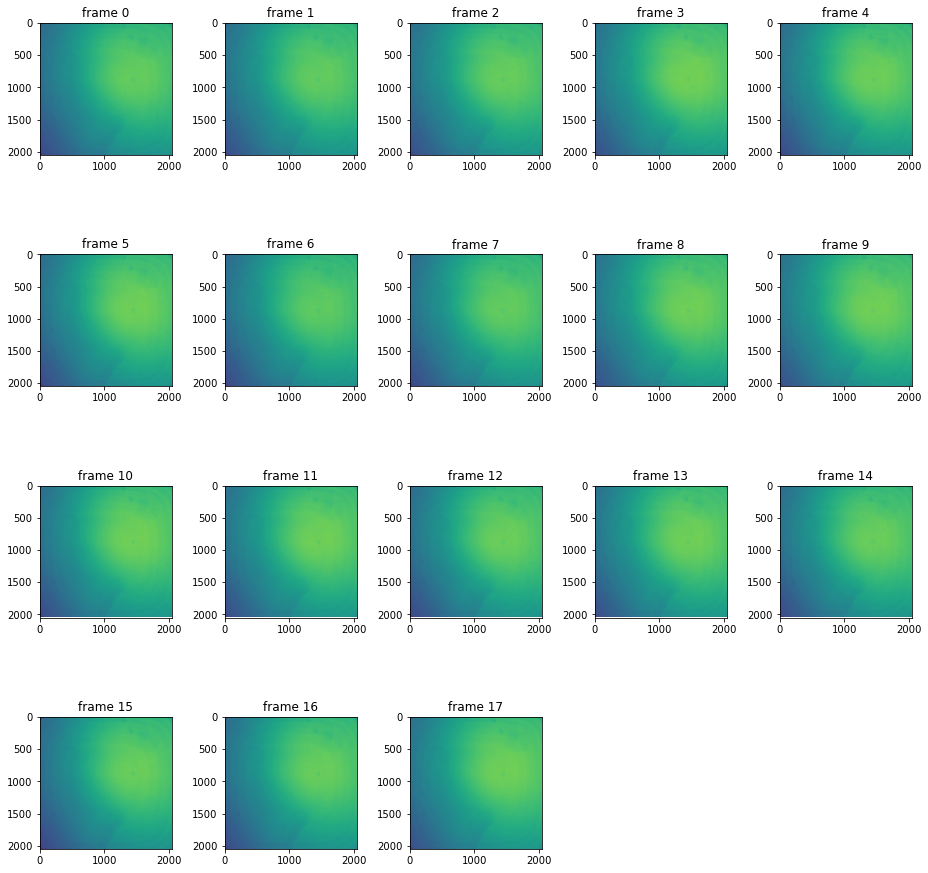

In [20]:
# plot frames
plt.rcParams["figure.figsize"] = (13,13)

L = len(test)
row = int(np.sqrt(L))
col = int(L/row) + 1

for i in range(L):
    plt.subplot(row,col,i+1)
    plt.imshow(test[i])
    plt.title("frame {}".format(i))
    
plt.tight_layout()
plt.show()

### Triggered Mode

In [21]:
from nidaqmx.task import Task

In [43]:
# Generate a Trigger   (depending on the ni board configuration you may need a single or multi channel task)
task_sigle_channel= Task()
task_sigle_channel.ao_channels.add_ao_voltage_chan("Dev3/ao0:0")

task_multi_channel= Task()
task_multi_channel.ao_channels.add_ao_voltage_chan("Dev3/ao0:3")

AOChannel(name=Dev3/ao0:3)

In [44]:
# Change camera trigger mode
cam.trigger_mode = TriggerMode.EXTERNAL_TRIGGER

In [45]:
#pulses to trigger the camera (the camera is actually triggered by the change from 5volt to 1volt or viceversa)
cam_pulses = [5., 0., 5., 0., 5., 0., 5., 0.]


In [46]:
#multi channel

loop_test = []
cam.start_acquisition()

#loop trough the pulses and write them
for i in cam_pulses:
    
    #multi channel input
    z_array = np.zeros((4, 1))
    z_array[3, :] = i
    
    task_multi_channel.write(z_array, auto_start=True)
    
    #delay
    sleep(1)
    
    #readout
    loop_test.append(cam.get_frames())



cam.stop_acquisition()

In [ ]:
#single channel

loop_test = []
cam.start_acquisition()

#loop trough the pulses and write them
for pulse in cam_pulses:
    
    task_sigle_channel.write(pulse, auto_start=True)
    
    #delay
    sleep(1)
    
    #readout
    loop_test.append(cam.get_frames())



cam.stop_acquisition()

In [59]:
#filter loop (in some cases the voltage went from high-to-low and didn't trigger the camera)
print("len of loop_test before: {}".format(len(loop_test)))
for item in loop_test:
    if len(item)==0:
        loop_test.remove(item)
        
print("len of loop_test after: {}".format(len(loop_test)))

len of loop_test before: 8
len of loop_test after: 4


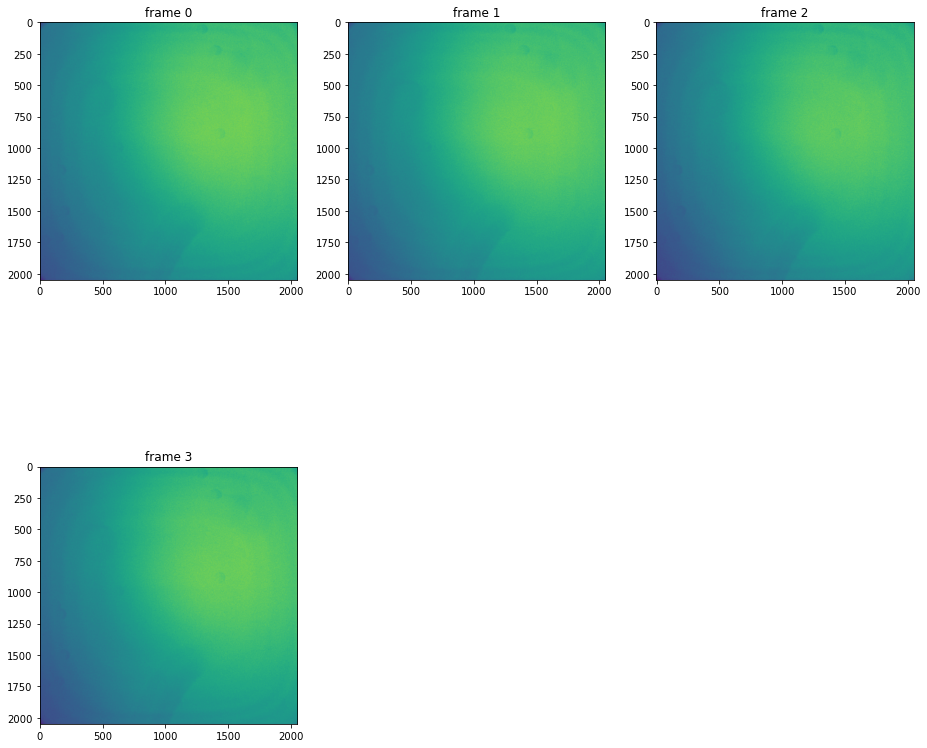

In [63]:
# plot frames
plt.rcParams["figure.figsize"] = (13,13)

L = len(loop_test)
row = int(np.sqrt(L))
col = int(L/row) + 1

for i in range(L):
    plt.subplot(row,col,i+1)
    plt.imshow(loop_test[i][0])
    plt.title("frame {}".format(i))
    
plt.tight_layout()
plt.show()